In [8]:
from IPython.display import Image

image_url = 'https://cdn.1min30.com/wp-content/uploads/2018/02/Couleur-logo-Netflix.jpg'
Image(url = image_url)

Loading the Important Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Importing the data

In [10]:
data = pd.read_csv('combined_data_1.txt', header = None, usecols=[0,1], names=['cust_id', 'Ratings'])

In [11]:
data

,cust_id,Ratings
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


## Cleaning and organizing the data

In [12]:
# Going to clean the data by making a new column movie id
n = None
list = []
for cust in data['cust_id']:
    if ":" in cust:
        n = int(cust.replace(":", " "))
    list.append(n)

In [13]:
data["Movie_id"] = list

In [14]:
data.head()

,cust_id,Ratings,Movie_id
0,1:,NaN,1
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   object 
 1   Ratings   float64
 2   Movie_id  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 550.7+ MB


In [16]:
data["cust_id"].str.contains(":").sum()

4499

In [17]:
# Dropping the null values
data.dropna(inplace=True)

In [18]:
# Properly converting the data type as required
data['cust_id'] = data['cust_id'].astype("int")

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   int32  
 1   Ratings   float64
 2   Movie_id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [20]:
data.head()

,cust_id,Ratings,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


### Now the movie data is cleaned so Now we can do some EDA in this

In [21]:
u_movies = data['Movie_id'].nunique()
u_movies

4499

In [22]:
data['cust_id'].nunique()

470758

> There are total 4499 Movies list and 470758 unique customers in this dataset

In [23]:
stars = data.groupby('Ratings')['Movie_id'].agg(['count'])
stars

,count
Ratings,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


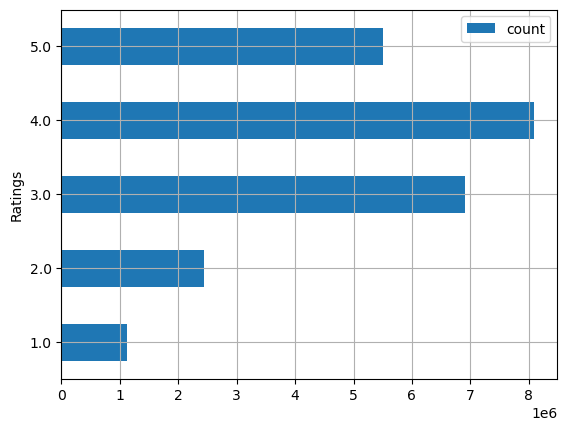

In [24]:
stars.plot(kind = 'barh')
plt.grid()

### In this graph we can see that 4 star graph is the most repested value

In [25]:
data.head()

,cust_id,Ratings,Movie_id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24053764 entries, 1 to 24058262
Data columns (total 3 columns):
 #   Column    Dtype  
---  ------    -----  
 0   cust_id   int32  
 1   Ratings   float64
 2   Movie_id  int64  
dtypes: float64(1), int32(1), int64(1)
memory usage: 642.3 MB


In [27]:
mov_summ = data.groupby('Movie_id')['Ratings'].agg(['count'])
mov_summ

,count
Movie_id,
1,547
2,145
3,2012
4,142
5,1140
...,...
4495,614
4496,9519
4497,714


In [28]:
cust_summ = data.groupby('cust_id')['Ratings'].agg(['count'])
cust_summ

,count
cust_id,
6,153
7,195
8,21
10,49
25,4
...,...
2649404,12
2649409,10
2649421,3


We can't suggest anyone the movie which gets oly 10 or 20 revies even though it rated 5 star and we can't say a customer id is genuine if we out of 4499 movies he watched only 1 or 2 movies

In [29]:
mov_rem = mov_summ['count'].quantile(0.6).round(0)
mov_rem

908.0

In [30]:
cust_rem = cust_summ['count'].quantile(0.6).round(0)
cust_rem

36.0

In [31]:
# Finding the index number of the things which we need to drop

mov_drop = mov_summ[mov_summ['count']<mov_rem].index
mov_drop

Index([   1,    2,    4,    7,    9,   10,   11,   12,   13,   14,
       ...
       4480, 4481, 4486, 4487, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int64', name='Movie_id', length=2699)

In [32]:
cust_drop = cust_summ[cust_summ['count']<cust_rem].index
cust_drop

Index([      8,      25,      33,      83,      94,     126,     130,     133,
           142,     149,
       ...
       2649337, 2649343, 2649351, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='cust_id', length=282042)

In [33]:
print(f'number of movie drop is {len(mov_drop)}')
print(f'number of customer drop is {len(cust_drop)}')

number of movie drop is 2699
number of customer drop is 282042


In [34]:
data = data[~data['Movie_id'].isin(mov_drop)]
data = data[~data['cust_id'].isin(cust_drop)]

In [35]:
data.shape

(19695836, 3)

In [36]:
data.isnull().sum()

cust_id     0
Ratings     0
Movie_id    0
dtype: int64

In [37]:
mov_title = pd.read_csv('movie_titles.csv', encoding='ISO-8859-1', header= None, usecols=[0,1,2], names=['Movie_id', 'Year', 'Title'])

In [38]:
mov_title.head()

,Movie_id,Year,Title
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW


In [39]:
netflix = data.merge(mov_title, on='Movie_id', how = 'left')
netflix

,cust_id,Ratings,Movie_id,Year,Title
0,712664,5.0,3,1997.0,Character
1,1331154,4.0,3,1997.0,Character
2,2632461,3.0,3,1997.0,Character
3,44937,5.0,3,1997.0,Character
4,656399,4.0,3,1997.0,Character
...,...,...,...,...,...
19695831,1055714,5.0,4496,1993.0,Farewell My Concubine
19695832,2643029,4.0,4496,1993.0,Farewell My Concubine
19695833,267802,4.0,4496,1993.0,Farewell My Concubine
19695834,1559566,3.0,4496,1993.0,Farewell My Concubine


In [ ]:
print("The most viewed movie is ")
print(netflix.sort_values("Ratings").head(1))
netflix.sort_values("Ratings", ascending = False).head(1)

The most viewed movie is 
         cust_id  Ratings  Movie_id    Year          Title
9847917   409101      1.0      2342  2004.0  Super Size Me


In [ ]:
print("The Most popular genre is: ")
print(netflix.groupby("Movie_name")["cust_ID"].agg(["sum"]).sort_values("sum",ascending = False).head(1))

In [ ]:
print("Worst Movie according to rating is: ")
print(netflix.sort_values("Rating").head(1))
print("Best Movie according to rating is: ")
print(netflix.sort_values("Rating", ascending = False).head(1))

## The conclusion of analysis

### The Most  Popular movie according to the data is:
####        - Pirates of the Caribbean: The Curse of The Black Magic which has 189048833266 views
### The Worst Movie according to rating is:
####        - Super Size me which has 1 star rating
### The Best movie according to rating is: 
####        - Character which has 5 star rating